Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|mery ferrando|12345|u1234|
|jan boone|67890|u6786|




See [the webpage](https://janboone.github.io/applied-economics/) for details of what we expect to see in this assignment.



# Preamble

Before we start the model description, we import the libraries that we will use below.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Paper: A model of taste discrimination

This is an example final assignment to give you an idea of what we expect you to do. You cannot use this notebook for your own final assignment.


In this assignment we do not discuss a paper (as you will do for your final assignment), but the assignment is based on Mery's gender economics lecture.

Economists have proposed several theories to explain why workers of certain groups (e.g., minorities, women) might have lower wages than workers of the majority group. One of these theories suggests that discrimination might arise if employers dislike hiring workers of certain groups. This type of discrimination is called taste discrimination.

We will see how taste discrimination works with a simple model. We assume that the gains that employers derive from the workers include the profits of the firm and some taste parameters. Let's further assume that some employers dislike hiring workers of a certain group. If the labor market works under perfect competition, discrimination cannot persist. The reason is that employers who do not have a dislike for certain workers, will offer equal wages to all workers, and they will drive the discriminatory employers out of the market. With perfect competition, one unbiased employer is enough to drive out all biased competitors.

Therefore, we will study the case of imperfect competition, where discrimination can persist. In particular, we focus on one biased employer who has monopsony power.

We will show that taste discrimination leads to lower wages for the employees that the employer dislikes.

# Research question

Does the group that is not discriminated against benefit from discrimination?

The model focuses on the effects on wage and hiring of the group that is discriminated against. We extend the model a bit to find the effects on the group that is not discriminated against.

# Motivation

If, in the real world, men benefit from discrimination against women in the labor market, one would expect some resistance from men against reforms that would level the playing field for women. Policy makers should take this expected resistance into account in designing policies to reduce discrimination.

# Preview of the answers

We find that the employer's bias reduces wage and employment of the group that is discriminated against.

For the group that is not discriminated against, we find that discrimination ... their wage and employment. We slightly extend the model by ... and find that in this extended model ...

*Note* since we ask you below what the effects are on the group that is not discriminated against, we do not provide the answers here; this explains the "..." above. Just to be clear: in your final assignments we expect you to fill in all the dots...

# Main assumptions

In our main model, the important assumptions are that the employer (i) has monopsony power, (ii) is biased against one group in the labor market and (iii) that production is not so profitable that the employer hires all workers.

Another assumption is ... which leads to the result on the group that is not discriminated against.

We make the following assumption in the extended version of the model: ...

# Model in the paper

*Note* that below we will combine model description and python code, which is something you can do as well in your final assignment.

## Imperfect competition and taste discrimination

If workers have limited personal mobility, firms can have monopsonic power. This means that employers can pay different wages to workers with the same ability. We will show that discrimination leads to lower wages and lower levels of employment for discriminated workers.

We consider a labor market composed of workers and a monopsonist employer. 

Workers belong to two different groups, denoted $F$ and $M$. All workers have the same productive abilities, and each of them produce a quantity $y$.

Each worker is willing to work as long as the wage offered by the monopsonist employer (denoted by $\mathcal{w_i}$ with $i=F,M$) is at least as high as her outside option. We call this minimum acceptable wage offer the reservation wage. Each worker supplies one unit of labor and the labor supply of workers of group $i$ is equal to:

\begin{equation}
\label{eq:L}
L^s(\mathcal{w_i})=G(\mathcal{w_i}) , \quad i=F, M
\end{equation}

where $G$ denotes the cumulative distribution function of the reservation wages. We assume $G^\prime>0, G^{\prime\prime}<0$, that is labor supply increases with respect to the wage at a decreasing rate.

# Python code

In the code below, we use the `pymc` library to generate random numbers from an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with parameter $\lambda=0.01$.

### question: one way in which we can model labor supply in python, is as follows:
- explain what `N, N_F, N_M` denote here?
- what does `outside_F` represent?

In [12]:
N = 10000
N_F = 5000
N_M = N - N_F
y = 100
outside_F = pm.Exponential.dist(0.01).random(size=N_F)
outside_M = pm.Exponential.dist(0.01).random(size=N_M)

### question: plot labor supply for `F` with labor on the horizontal axis and the wage on the vertical axis.

In [ ]:
# YOUR CODE HERE

The monopsonist employer's gain from employing a worker of group $M$ is simply the output minus the wage received by a worker of this group:

\begin{equation}
\pi = y - \mathcal{w}_M 
\end{equation}

Given that the employer dislikes hiring workers of group $F$, his gain from employing such a worker is equal to:

\begin{equation}
\pi = y - \mathcal{w}_F - u
\end{equation}

where $u>0$ represents the aversion the employer feels towards workers of group $F$. 

The employer's maximization problem can be described as follows:

\begin{equation}
\label{eq:maxpr}
\max_{{\mathcal{w}_F, \mathcal{w}_M}} \Pi = G(\mathcal{w}_F) (y-\mathcal{w}_F-u)+G(\mathcal{w}_M)(y-\mathcal{w}_M), \quad 0<u<y
\end{equation}

Differentiating the objective function with respect to $\mathcal{w}_F$ and $\mathcal{w}_M$, we can find the optimality conditions (and the values of the remunerations received by workers of each group).
                                                          
\begin{align}
\frac{\partial \Pi}{\partial \mathcal{w}_F}&=0 \iff G^{\prime}(\mathcal{w}_F)(y-\mathcal{w}_F-u)-G(\mathcal{w}_F)=0  \iff \\ 
 & \quad \quad  \iff G^{\prime}(\mathcal{w}_F)=\frac{G(\mathcal{w}_F)}{(y-\mathcal{w}_F-u)} \\                                                         \frac{\partial \Pi}{\partial \mathcal{w}_M}&=0 \iff G^{\prime}(\mathcal{w}_M)=\frac{G(\mathcal{w}_M)}{(y-\mathcal{w}_M)}
\end{align}                                                                                                                               
Profits are maximized at the tangency point between the labor supply function and an isoprofit curve. That is, at equilibrium the slope of the labor supply function must be equal to that of the isoprofit curve. We can directly see that the expressions in the left-hand side of the first order conditions above correspond to the slope of the labor supply function ($G^\prime({\mathcal{w}_i})$), and we can easily verify that the expressions in the right-hand side correspond to the slope of the isoprofit curve (see *Note* below).  

Given that $u>0$, we can see that the slope of the isoprofit curve for the jobs in group $F$ is greater than the slope of the isoprofit curve for the jobs in group $M$ for every pair ($\mathcal{w}, L$). Now, given that $G(\mathcal{w_i})$ increases at a decreasing marginal rate (that is, $G^\prime(\mathcal{w_i})$ is decreasing), for the first order conditions to be satisfied we need:
                                                                            \begin{equation}                                                  \mathcal{w}^*_F<\mathcal{w}^*_M                                                            \end{equation}
                                                                            and hence $L(\mathcal{w}^*_F)<L(\mathcal{w}^*_M)$. The intuition for this is simply that fewer workers of group $F$ are willing to work because they are paid a lower wage.  
                                                                                                                              
                                                         

The profit function can be programmed as follows. Recall that to get the symbol $\pi$ in python code, we type `\pi` and then the TAB key. Jupyter then turns the latex code `\pi` into the Greek symbol.

Total employment is given by $x$ and each employed worker generates output $y$. Each employed worker needs to be paid her/his wage. Further, the employer has aversion $u$ against hiring an `F` employee.

In [32]:
def π(w_F,w_M,u):
    L_F = labour_supply(w_F,outside_F)
    L_M = labour_supply(w_M,outside_M)
    x = L_F + L_M
    return y*x - L_F*(w_F+u) - L_M*(w_M)

Now we solve for the profit maximizing wages for `F` and `M`. Since the function $\pi$ is not differentiable, we use `method='Nelder-Mead'` here. We did not discuss this in class, so do not worry about this.

In [33]:
outcome_no_discrimination = sp.optimize.minimize(lambda x: -π(x[0],x[1],0), [65,65],method='Nelder-Mead')
outcome_no_discrimination

 final_simplex: (array([[43.81503564, 44.61405228],
       [43.81503565, 44.61405229],
       [43.81503565, 44.61405231]]), array([-201034.80322838, -201034.80320824, -201034.80316877]))
           fun: -201034.80322838147
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 105
        status: 0
       success: True
             x: array([43.81503564, 44.61405228])

### question: why is the outcome not perfectly symmetric?

-----------------------------------
*Note* here we illustrate different ways in which you can calculate/think of the profit maximizing wages. In your own final assignment you do not need to illustrate outcomes to this extend.

We compute the slope of the isoprofit curve for workers of group $F$ (similar reasoning can be applied to workers of group $M$).  


The employer's profits from hiring workers of group $F$ can be written as: 
\begin{equation}
\pi=L^s(\mathcal{w}_F)(y-\mathcal{w}_F-u)                                
\end{equation}                                                             
 
Hence, points along a given isoprofit curve satisfy:
\begin{equation}
\bar{\pi}=L^s(\mathcal{w}_F)(y-\mathcal{w}_F-u)                                                 
\end{equation}      

We can total differentiate the isoprofit curve to get:
\begin{equation}
dL^s(\mathcal{w}_F)(y−\mathcal{w}_F-u) − L^s(\mathcal{w}_F)d\mathcal{w}_F = 0 \iff \frac{dL^s(\mathcal{w}_F)}{d\mathcal{w}_F} = \frac{L^s(\mathcal{w}_F)}{y-\mathcal{w}_F-u}
\end{equation}



### question: illustrate this reasoning with your plot of labor supply from above and the "correct" iso-profit curve for the case where there is no discrimination (`u=0`).





In [1]:
# YOUR CODE HERE

Another way in which we can visualize what the profit maximizing wages are, is to use a 3D-plot: $\mathcal{w}_F,\mathcal{w}_M$ on the $x,y$ axes and profits on the $z$ axis. Such 3D plots are often hard to get right, and hence we use a contour plot here.

The lines in the contour plot are iso-profit lines and you can see how the "top of the mountain" is around the point $(45,45)$.

To facilitate the creation of the contour plot, we use the following:
- the "decorator" `@np.vectorize`
- the function `np.meshgrid`
- and the function `contour` from `matplotlib`

The decorator [vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) makes sure that we can use vectors for `w_F,w_M` although the function was actually defined with scalars `w_F,w_M` in mind.

To see what the function `meshgrid` does, you can apply to it to a simple example like `np.meshgrid(np.arange(5),np.arange(5))` and you see what it does. It is very useful when you want to calculate a function $f(x,y)$ for all combinations of values $(x,y)$ without using double for-loops.

Finally, the function `contour` takes values for $X,Y$ and $Z$ and shows the combination of $x,y$ where $z$ is constant.

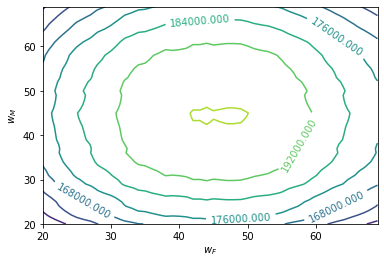

In [38]:
@np.vectorize
def π(w_F,w_M,u):
    L_F = labour_supply(w_F,outside_F)
    L_M = labour_supply(w_M,outside_M)
    x = L_F + L_M
    return y*x - L_F*(w_F+u) - L_M*(w_M)

# Make data.
range_w = np.arange(20,70)
X, Y = np.meshgrid(range_w,range_w)
Z = π(X,Y,0)

# Plot the surface.
fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('$w_F$')
ax.set_ylabel('$w_M$');

---------------------------------------------------------

Now we want to understand how discrimination $u>0$ affects wages `w_F,w_M` and employment of the two groups.

Using the first order conditions above, we can derive the exact expressions for the equilibrium wages of workers in each group. It is convenient to express them as a function of the wage elasticity of labor supply.                                                                                                 


We can rearrange the first order condition for $\mathcal{w}_F$ above as follows: 
   
\begin{align}
  G^\prime(\mathcal{w}_F)(y-\mathcal{w}_F-u)&-G(\mathcal{w}_F)=0 \iff \frac{G^\prime(\mathcal{w}_F)}{G(\mathcal{w}_F)}(y-\mathcal{w}_F-u) - 1=0 \iff \\
                                                                    \iff   & \frac{G^\prime(\mathcal{w}_F)}{G(\mathcal{w}_F)}\mathcal{w}_F \left(\frac{y-u}{\mathcal{w}_F} -1 \right) - 1=0   
\end{align}
                                                                                                                              
Define $\eta^L_\mathcal{w}(\mathcal{w_i}) = \frac{G^\prime(\mathcal{w_i})}{G(\mathcal{w_i})}\mathcal{w_i}$ the wage elasticity of labor supply for workers of group $i=F, M$. Recall that $L^s(\mathcal{w_i})=G(\mathcal{w_i})$, and hence $G^\prime(\mathcal{w_i})=\frac{\partial L^s(\mathcal{w_i})}{\partial \mathcal{w_i}}$.
                                         
We do some additional rearrangements to find the equilibrium wage for workers of group $F$ ($\mathcal{w}_F^*$) as a function of the wage elasticity of labor supply and other parameters of the model:
                                                                                                                              
\begin{align}
\frac{G^\prime(\mathcal{w}_F)}{G(\mathcal{w}_F)}&\mathcal{w}_F \left(\frac{y-u}{\mathcal{w}_F} -1 \right) - 1=0 \iff
\eta^L_{\mathcal{w}}(\mathcal{w}_F) \left(\frac{y-u}{\mathcal{w}_F}-1 \right) =1 \iff \\
    &\iff                                                           \frac{y-u}{\mathcal{w}_F}=\frac{1}{\eta^L_{\mathcal{w}}(\mathcal{w}_F)}+1 \iff                                                                      \mathcal{w}^*_F=(y-u)\frac{\eta^L_{\mathcal{w}}(\mathcal{w}^*_F)}{1+\eta^L_{\mathcal{w}}(\mathcal{w}^*_F)}
\end{align}
 
Note that $\mathcal{w}^*_F<y$, where $y$ is the marginal product of labor or productivity. Under perfect competition, the equilibrium wage must be equal to the marginal product of labor. This implies that the monopsonist sets a lower wage than the competitive wage. There are two reasons for this. First, the employer is a monopsonist, and hence has market power. Second, the employer pays a lower wage to workers of group $F$ because of the aversion that he feels towards them, given by parameter $u$. 
                                                                                         
Using a similar reasoning, we can get the equilibrium wage for workers of group $M$:
                                                                           \begin{equation}            
   \mathcal{w}^*_M=y\frac{\eta^L_{\mathcal{w}}(\mathcal{w}^*_M)}{1+\eta^L_{\mathcal{w}}(\mathcal{w}^*_M)}
\end{equation}   

Note that $\frac{\eta^L_{\mathcal{w}}(\mathcal{w}^*_M)}{1+\eta^L_{\mathcal{w}}(\mathcal{w}^*_M)}<1$ implies that, again, $\mathcal{w}^*_M < y$. But workers of group $M$ do not get penalized by the dislike parameter.
                                                                                                                              
We have found that $\mathcal{w}_F^*<\mathcal{w}_M^*$, and  $L^s(\mathcal{w}_F^*)<L^s(\mathcal{w}_M^*)$. 
Therefore, the monopsony model shows that the taste for discrimination leads to lower wages and lower levels of employment for members of the discriminated groups.                                                                         
In python we can numerically calculate the equilibrium wages for different values of $u$.

### question: plot equibrium wages for `F` and `M` for a range of values of `u` and save the outcomes in a `pandas` dataframe

In [ ]:
# YOUR CODE HERE

### question: plot the number of `F` and `M` employees hired. 

In [2]:
# YOUR CODE HERE

### question: what do you see? What is the intuition for this?

In particular, one would expect that `M` employees benefit from the discrimination $u>0$ against `F` employees. Do we see this in the model here? Why (not)?

### question: if `M` does not benefit from the discrimination against `F`, can you adapt the model (slightly) so that this intuition can be seen in the model?

Now we can see that `M` employees clearly benefit from discrimination ($u>0$) against `F`. As $u$ increases, hiring `F` employees becomes less attractive for the firm. Hiring fewer `F` employees, reduces production and hence increase the price of output. This makes it more attractive to hire `M` employees, thereby increasing their wages.


In [3]:
# YOUR CODE HERE

# Discussion and conclusion

We analyzed a model where the employer is biased against a group of employees. The bias causes this group to have a lower wage and lower employment. The group that is not discriminated against has ...

We extend the model with ... and then the group that is not discriminated against ...

The policy implication of this finding is that ...

An important assumption of the model is that the employer has monopsony power. This form of market power allows the employer's bias to affect wages and employment. Since workers are generally speaking not perfectly mobile (e.g. due to their education or home location) this seems a more reasonable assumption in many employment contexts than perfect competition. This model then explains how employers' biases cause adverse labor market outcomes for the group that is discriminated against.

# Postscript

A couple of things to note about this notebook as final assignment.

First, we turned the notebook into a programming exercise (with questions) that we discuss in class. You (obviously) do not need to do this for your final assignment.

Second, Mery in her lecture discussed more things than we report in this notebook. This applies for your final assignment as well. You do **not** need to replicate all the analysis of the paper in your final assignment. Choose a story line "through the paper". Report the results from the paper to get to a coherent analysis leading up to your (small) extension of the paper.

Third, we have chosen one option here to extend the model (what is the effect on `M` employees on discrimination against `F` employees), but you could have chosen a different question. E.g. if we observe in reality that $\mathcal{w}_F < \mathcal{w}_M$ does this prove that (some) employers discriminate ($u>0$) against the `F` employees? Or can the model give other explanations for $\mathcal{w}_F < \mathcal{w}_M$ etc.